### Student Information
Name:劉禹德

Student ID:109071021

GitHub ID: Yu109071021

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# First part

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
X.at[10, 'category']
X.iat[10,1]

3

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### We can see that NA_df's missing_example column are NaN or None or '', but by using isnull(),
### not all of them are True. This is because some of them are not really missing value, e.g. id=D,
### its missing_example 's value is 'NaN' and this is a string type, it actyally has a value, not missing.
### So is.null() are not working by identifing the words like 'NaN' or 'None'.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### Nothing changges to X dataframe.After sampling , X is as same as before,
### but X_sample 's index is not as same as X, its order are differeent

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

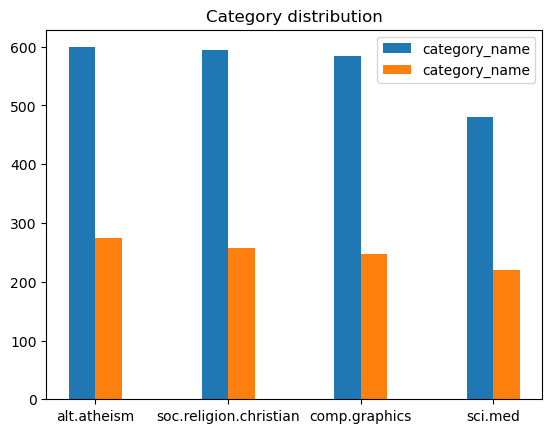

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

X_sample = X.sample(1000)
X_axis = np.arange(len(categories))
  
plt.bar(X_axis -0.1,X.category_name.value_counts(), 0.2, label = 'category_name')
plt.bar(X_axis + 0.1,X_sample.category_name.value_counts(), 0.2, label = 'category_name')
  
plt.xticks(X_axis, categories)
plt.title("Category distribution")
plt.legend()
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.`

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
c = X_counts[0:5, 0:100].toarray()
c5 = c[4].tolist()
ans = []
while True:
    try:
        ans.append(c5.index(1))
        c5.pop(c5.index(1))
    except:break
print(count_vect.get_feature_names_out()[ans[-1]])

00pm


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts.toarray() # X_counts[how many]
#df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

#plt.subplots(figsize=(9, 7))
#ax = sns.heatmap(df_todraw,
 #                cmap="PuRd",
  #              annot=True)


### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

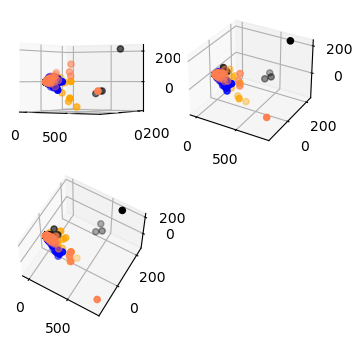

In [7]:
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d.axes3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

def plot3d():
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys,zs, c = c, marker='o')
    
      
fig = plt.figure(figsize=(4,4))
    
ax = fig.add_subplot(221, projection='3d')
plot3d()
ax.view_init(0)

ax = fig.add_subplot(222, projection='3d')
plot3d()
ax.view_init(30)

ax = fig.add_subplot(223, projection='3d')
plot3d()
ax.view_init(60)

### We can see that the most points are near by 0 in three axis, only a little points exceed 100

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = make_subplots(rows = 1, 
                    cols = 1, 
                    shared_xaxes = True)

fig.add_trace(go.Bar(x = count_vect.get_feature_names_out()[:300], 
                     y = term_frequencies[:300], 
                     showlegend = False))



fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


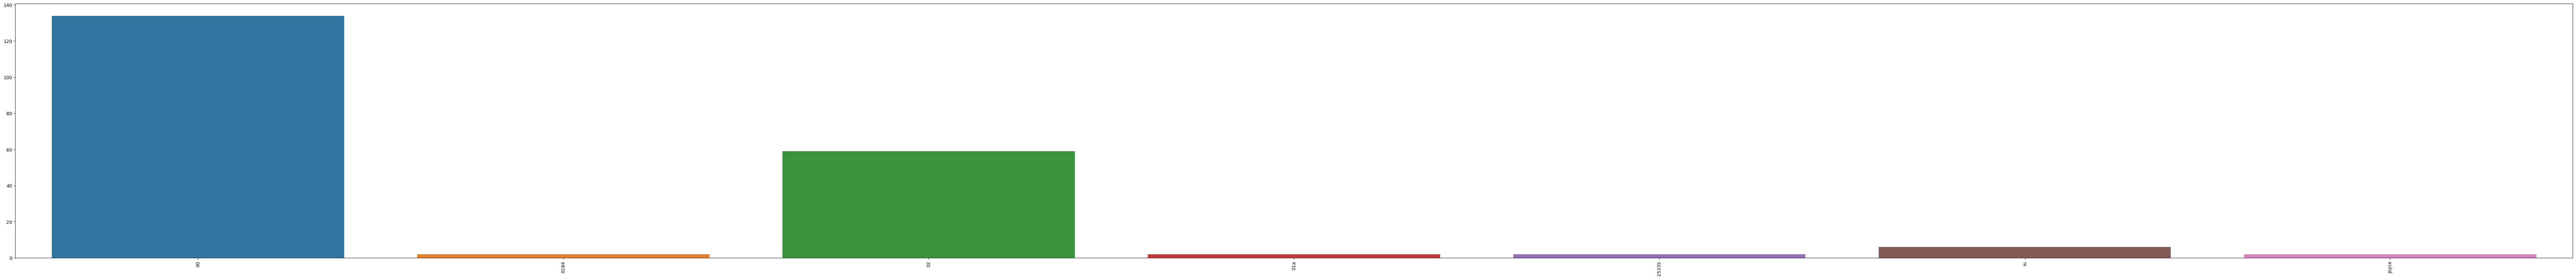

In [9]:
import seaborn as sns
term_frequencies = pd.Series(np.asarray(X_counts.sum(axis=0))[0],index=count_vect.get_feature_names_out())
reduced_term_frequencies = term_frequencies[['00','0184','02','01a','25335','iu','joyce']]
reduced_term_frequencies

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=reduced_term_frequencies.index, 
            y=reduced_term_frequencies)
g.set_xticklabels(reduced_term_frequencies.index, rotation = 90);


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

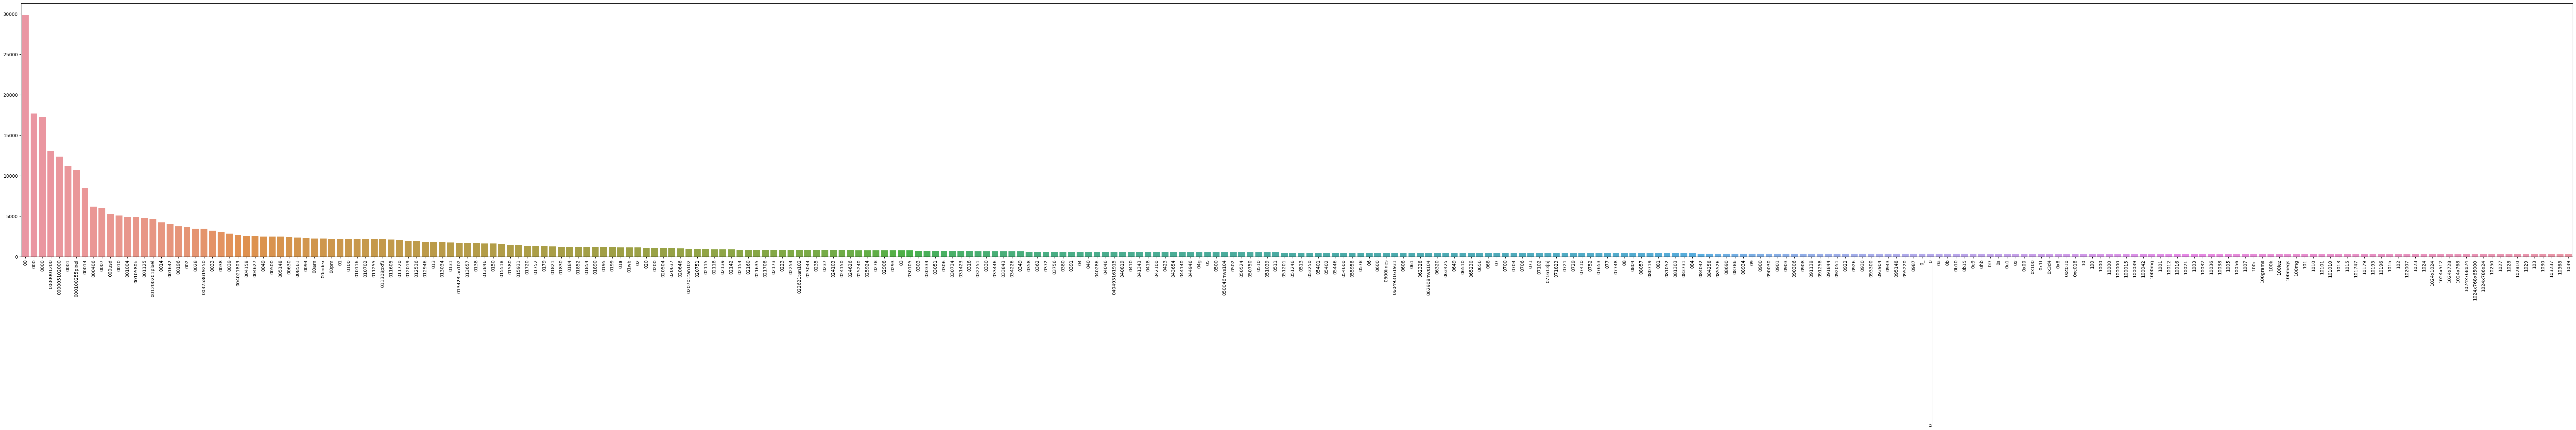

In [10]:
term_frequencies = pd.Series(np.asarray(X_counts.sum(axis=0))[0],index=count_vect.get_feature_names_out())
term_frequencies.sort_values(inplace=True)
term_frequencies = term_frequencies.iloc[::-1]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [11]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer() #turn every variables into binary only 0 or1
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
print(X['bin_category_name'])

0       [0, 1, 0, 0]
1       [0, 1, 0, 0]
2       [0, 0, 0, 1]
3       [0, 0, 0, 1]
4       [0, 0, 0, 1]
            ...     
2252    [0, 0, 1, 0]
2253    [0, 0, 1, 0]
2254    [0, 0, 1, 0]
2255    [0, 0, 1, 0]
2256    [0, 0, 1, 0]
Name: bin_category_name, Length: 2257, dtype: object


### Yes, it works.

# Second part


## 1.Prepare Data


In [12]:
file_list = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']


lines_list = []
for file in file_list:
    fr = open('sentiment labelled sentences/' + file,encoding="utf-8")
    lines=fr.readlines()
    lines_list.extend(lines)
    fr.close()
    



## 2. Data Transformation

In [13]:
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.transform_lines(lines_list),columns=['sentence','score'])
print(X.sentence[:10])

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object


## 3.Data Mining using Pandas

### 3.1 Missing Values

In [14]:
X.isnull()

sentence  score
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
2995     False  False
2996     False  False
2997     False  False
2998     False  False
2999     False  False

[3000 rows x 2 columns]

In [15]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [16]:
dummy_series = pd.Series(["dummy_record"], index=["sentence"])
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
print(len(result_with_series))
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))


3001


sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

In [17]:
# add dummy into original X
dummy_dict = [{'sentence': 'dummy_record',
              }]

X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
print(len(X))
X.isnull().apply(lambda x: dmh.check_missing_values(x))




3001


sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

In [18]:
#drop na
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
print(len(X))

3000


### 3.2 Dealing with Duplicate Data

In [19]:
print(X.duplicated())
print(len(X))
print(sum(X.duplicated()))

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool
3000
18


In [20]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [21]:
print(len(X))
print(sum(X.duplicated()))

2964
0


## 4.Data Preprocessing

### 4.1 Sampling

In [22]:
X = pd.DataFrame.from_records(dmh.transform_lines(lines_list),columns=['sentence','score'])
X

sentence score
0     So there is no way for me to plug it in here i...     0
1                           Good case, Excellent value.     1
2                                Great for the jawbone.     1
3     Tied to charger for conversations lasting more...     0
4                                     The mic is great.     1
...                                                 ...   ...
2995  I think food should have flavor and texture an...     0
2996                           Appetite instantly gone.     0
2997  Overall I was not impressed and would not go b...     0
2998  The whole experience was underwhelming, and I ...     0
2999  Then, as if I hadn't wasted enough of my life ...     0

[3000 rows x 2 columns]

In [23]:
X_sample = X.sample(n=1000) #random state
print(len(X_sample))
print(X_sample[:5])
print(X_sample.score.value_counts())

1000
                                               sentence score
949                 I had to purchase a different case.     0
1035  As they say in Canada, This is the fun game, aye.     1
2757                      This is a GREAT place to eat!     1
2288                             This place is amazing!     1
2837  I have never had such bland food which surpris...     0
1    506
0    494
Name: score, dtype: int64


<AxesSubplot:title={'center':'0  or 1 distribution'}>

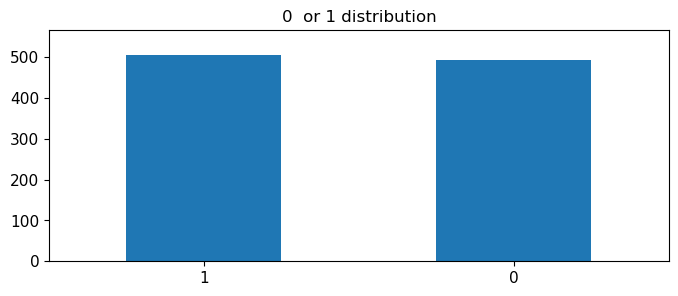

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

upper_bound = max(X_sample.score.value_counts())+60

# plot barchart for X rot:rotation
X_sample.score.value_counts().plot(kind = 'bar',
                                    title = '0  or 1 distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))



### 4.2 Feature Creation

In [25]:
import nltk

# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
print(X[0:4]["unigrams"])


0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object


### 4.3 Feature subset selection

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

#0 means the first record (or array[[0]])
#the random numbers mean the index of a term

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [27]:
count_vect.get_feature_names_out()


array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [28]:
print(X_counts.shape)

(3000, 5155)


In [29]:
X_counts[0:3, 0:50].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [30]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[4530:4550]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 4530:4550].toarray() # X_counts[how many]
plot_z

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0,

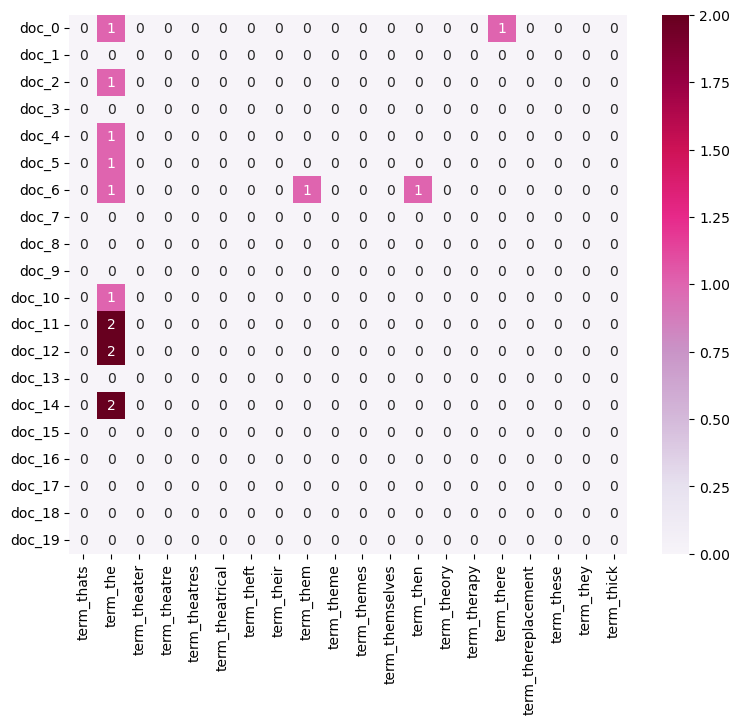

In [31]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

### 4.4 Dimensionality Reduction

In [32]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(3000, 2)


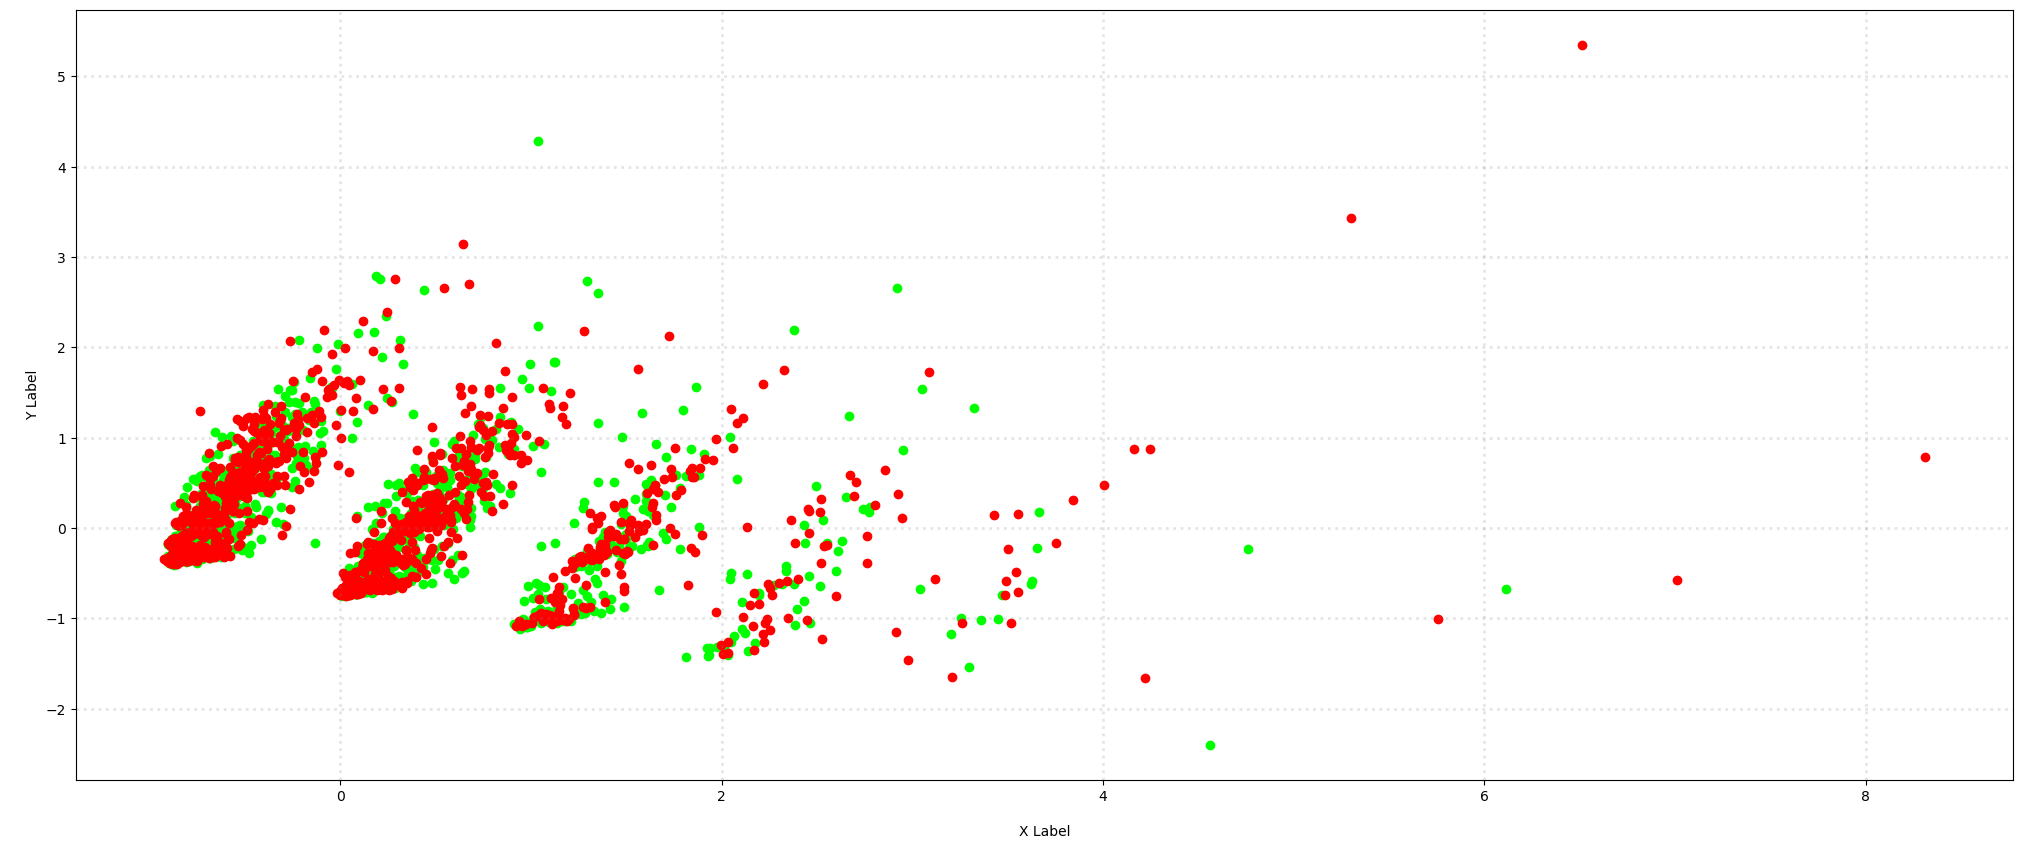

In [33]:
col = ['lime', 'red']
categories = ['0','1']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 4.5 Attribute Transformation / Aggregation

In [34]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [35]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [36]:
term_frequencies[0] #sum of first term 00

1

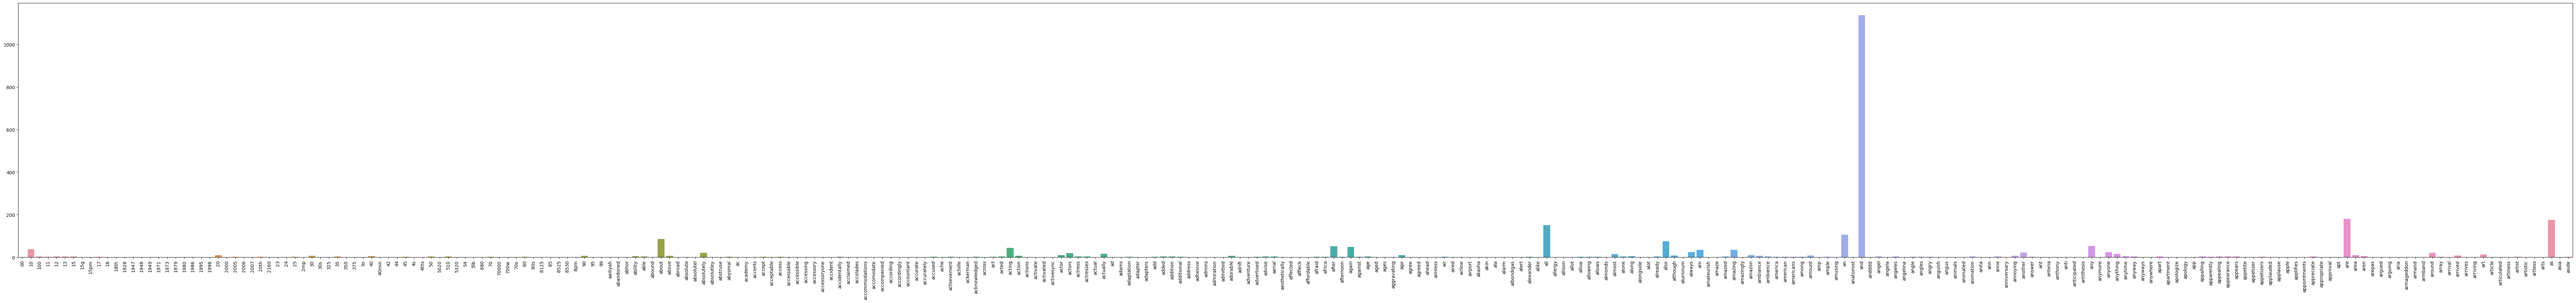

In [37]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

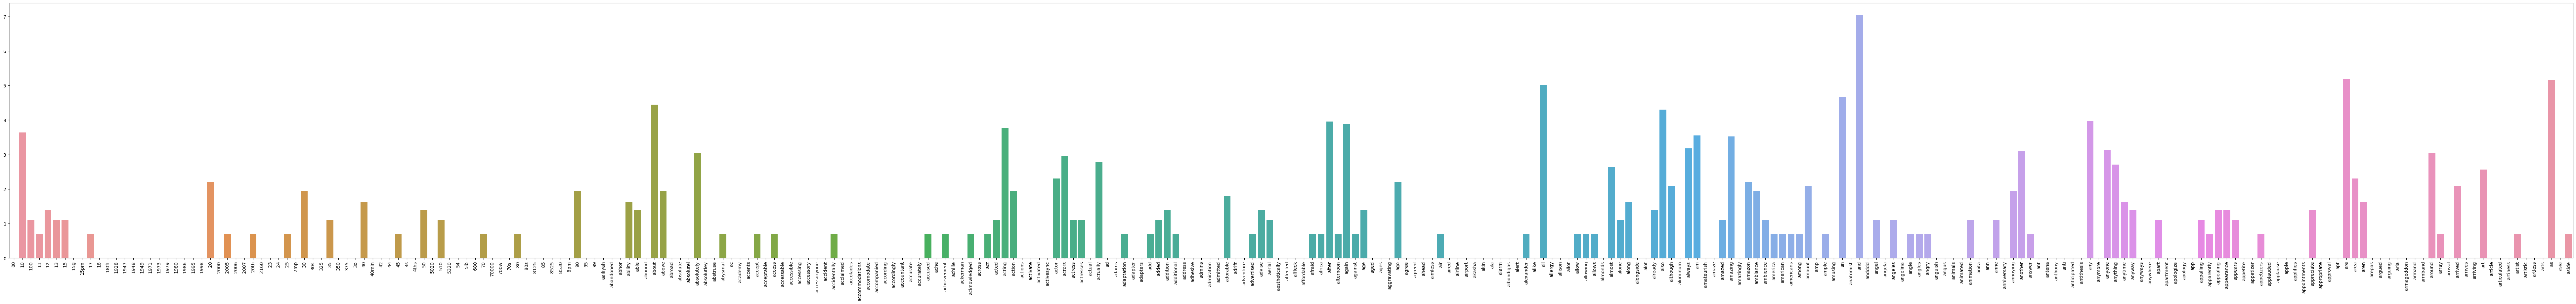

In [38]:
# transform the values in that vector into the log distribution
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 4.6 Discretization and Binarization¶

In [39]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer() #turn every variables into binary only 0 or1
mlb.fit(X.score)
X['bin_score'] = mlb.transform(X['score']).tolist()
print(X.bin_score[0:9])

0    [0]
1    [1]
2    [1]
3    [0]
4    [1]
5    [0]
6    [0]
7    [1]
8    [0]
Name: bin_score, dtype: object


## 5. Data Exploration

In [40]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [41]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [42]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third part

## 1.Generate meaningful new data visualizations

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd

In [45]:
# positive and negative counts comparison
fig = px.bar(X.score.value_counts(), title='positive and negative counts comparison')
fig.show()

In [46]:
#concentration of 0&1 in sentenec length
X['sentence_length'] = X.sentence.apply(lambda x : len(x))
X['sentence_length'].describe()




count    3000.000000
mean       64.604667
std        43.916222
min         5.000000
25%        32.000000
50%        55.000000
75%        87.000000
max       477.000000
Name: sentence_length, dtype: float64

In [47]:
# Scatter of sentenec length
fig = make_subplots(rows = 1, 
                        cols = 1, 
                        shared_xaxes = True, 
                        vertical_spacing = 0.05, 
                        horizontal_spacing = 0.05,
                        )


fig.add_trace(go.Scatter(x = X[X['score']=='1'].index, 
                     y = X['sentence_length'], 
                     showlegend = False,
                     name = 'positive',

                     mode='markers',
                     marker = dict(color = 'red')), 
                      )

fig.add_trace(go.Scatter(x = X[X['score']=='0'].index, 
                     y = X['sentence_length'], 
                     showlegend = False,
                     name = 'negative',

                     mode='markers',
                     marker = dict(color = 'green')), 
                      )


### positive or negative seem to be not relative to sentence' length

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [49]:
# no stop_words
count_vect = CountVectorizer()
X_p_counts = count_vect.fit_transform(X[X['score']=='1'].sentence) #learn the vocabulary and return document-term matrix
term_p_frequencies = pd.Series(np.asarray(X_p_counts.sum(axis=0))[0],index=count_vect.get_feature_names_out())
term_p_frequencies.sort_values(inplace=True)
term_p_frequencies = term_p_frequencies.iloc[::-1]


count_vect = CountVectorizer()
X_n_counts = count_vect.fit_transform(X[X['score']=='0'].sentence) #learn the vocabulary and return document-term matrix
term_n_frequencies = pd.Series(np.asarray(X_n_counts.sum(axis=0))[0],index=count_vect.get_feature_names_out())
term_n_frequencies.sort_values(inplace=True)
term_n_frequencies = term_n_frequencies.iloc[::-1]



### Pie chart

In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=term_p_frequencies.index[:10], values=term_p_frequencies[:10], name="Positive"),
              1, 1)
fig.add_trace(go.Pie(labels=term_n_frequencies.index[:10], values=term_n_frequencies[:10], name="Negative"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="P&N words comparison",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Positive', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Negative', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [51]:
# add stop_words
p_words = list(term_p_frequencies.iloc[:20].index)
n_words = list(term_n_frequencies.iloc[:20].index)

stop_words = []
for i in p_words: 
    if i in n_words:
        stop_words.append(i)
        

#with stop_words
count_vect = CountVectorizer(stop_words=stop_words)
X_p_counts = count_vect.fit_transform(X[X['score']=='1'].sentence) #learn the vocabulary and return document-term matrix
term_p_frequencies = pd.Series(np.asarray(X_p_counts.sum(axis=0))[0],index=count_vect.get_feature_names_out())
term_p_frequencies.sort_values(inplace=True)
term_p_frequencies = term_p_frequencies.iloc[::-1]


count_vect = CountVectorizer(stop_words=stop_words)
X_n_counts = count_vect.fit_transform(X[X['score']=='0'].sentence) #learn the vocabulary and return document-term matrix
term_n_frequencies = pd.Series(np.asarray(X_n_counts.sum(axis=0))[0],index=count_vect.get_feature_names_out())
term_n_frequencies.sort_values(inplace=True)
term_n_frequencies = term_n_frequencies.iloc[::-1]        
        


In [52]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=term_p_frequencies.index[:10], values=term_p_frequencies[:10], name="Positive"),
              1, 1)
fig.add_trace(go.Pie(labels=term_n_frequencies.index[:10], values=term_n_frequencies[:10], name="Negative"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="P&N words comparison",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Positive', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Negative', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

### It seems that film is more positive than movie because film has more percent than movie in positive_list and movie appears in negative_list but film not

## 2.Generate TF-IDF features

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = TfidfVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[2999])

  (0, 1387)	0.2933113788886697
  (0, 5110)	0.2933113788886697
  (0, 3437)	0.2933113788886697
  (0, 3857)	0.2688563788371658
  (0, 2068)	0.27900612090340604
  (0, 588)	0.2444013787856619
  (0, 4630)	0.2272721254424461
  (0, 785)	0.23652862720861087
  (0, 4548)	0.15459221685860466
  (0, 1540)	0.19036919661541044
  (0, 2630)	0.20020251407365736
  (0, 3166)	0.1590081111350756
  (0, 297)	0.1424258626606227
  (0, 4593)	0.1509789020630443
  (0, 2982)	0.12636813528037644
  (0, 4974)	0.23316597852822427
  (0, 3097)	0.09566242366609848
  (0, 4542)	0.19232976249660635
  (0, 2282)	0.15424800820352708
  (0, 647)	0.16451211376471578
  (0, 4531)	0.19157792350661482
  (0, 2314)	0.1088465353358322
  (0, 2432)	0.08823511344907804
  (0, 4609)	0.09388530161179545
  (0, 4545)	0.15290380344052162


## 3. Naive Bayes classifier 

### a) word frequency features

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# count vectorizer: compute term frequency(TF)

train_X = X['sentence'].iloc[:int(len(X)*0.7)]   # '0' corresponds to Texts/Reviews
train_y = X['score'].iloc[:int(len(X)*0.7)]   # '1' corresponds to Label (1 - positive and 0 - negative)
test_X = X['sentence'].iloc[int(len(X)*0.7):]
test_y = X['score'].iloc[int(len(X)*0.7):]


# 1. count vectorizer
tf_vectorizer = CountVectorizer()
X_train_tf = tf_vectorizer.fit_transform(train_X)

# 2. Transforming test data into tf-vectorized matrix
X_test_tf = tf_vectorizer.transform(test_X)

# We want our terms(vocabulary) from training data and then calculate it's term frequency. So, 
# in fit_transform function, fit is to extract all the unique words and transform is to make term
# frequency matrix of the data for all the unique terms extracted from fit part.

# 3. Applying Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

# 4. Calculating accuracy and generating classification report from test data
y_pred = naive_bayes_classifier.predict(X_test_tf)
score1 = metrics.accuracy_score(test_y, y_pred)

print(f'Accuracy: {score1:.4f}')
print(metrics.classification_report(test_y, y_pred,
                                            target_names=['Positive', 'Negative']))
print("confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred))



Accuracy: 0.7944
              precision    recall  f1-score   support

    Positive       0.78      0.82      0.80       454
    Negative       0.81      0.77      0.79       446

    accuracy                           0.79       900
   macro avg       0.79      0.79      0.79       900
weighted avg       0.79      0.79      0.79       900

confusion matrix:
[[371  83]
 [102 344]]


### b) TF-IDF features

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_X = X['sentence'].iloc[:int(len(X)*0.7)]   # '0' corresponds to Texts/Reviews
train_y = X['score'].iloc[:int(len(X)*0.7)]   # '1' corresponds to Label (1 - positive and 0 - negative)
test_X = X['sentence'].iloc[int(len(X)*0.7):]
test_y = X['score'].iloc[int(len(X)*0.7):]


# 1. Tf_idf vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_X)

# 2. Transforming test data into tfidf-vectorized matrix
X_test_tfidf = tfidf_vectorizer.transform(test_X)

# We want our terms(vocabulary) from training data and then calculate it's term frequency. So, 
# in fit_transform function, fit is to extract all the unique words and transform is to make term
# frequency matrix of the data for all the unique terms extracted from fit part.

# 3. Applying Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, train_y)

# 4. Calculating accuracy and generating classification report from test data
y_pred = naive_bayes_classifier.predict(X_test_tfidf)
score1 = metrics.accuracy_score(test_y, y_pred)

print(f'Accuracy: {score1:.4f}')
print(metrics.classification_report(test_y, y_pred,
                                            target_names=['Positive', 'Negative']))
print("confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred))




Accuracy: 0.7889
              precision    recall  f1-score   support

    Positive       0.79      0.79      0.79       454
    Negative       0.78      0.79      0.79       446

    accuracy                           0.79       900
   macro avg       0.79      0.79      0.79       900
weighted avg       0.79      0.79      0.79       900

confusion matrix:
[[357  97]
 [ 93 353]]


### Either 'word frequency features' or 'TF-IDF features' through  Naive Bayes classifier can get rather high accuracy(>78%), and the former one is a little bit higher than later one (0.7944>0.7889). Additionally, from confusion matrix, we can see 'word frequency features' is more accurate in predicting positive sentiment(82%>77%). On the other hand, 'TF-IDF features' has almost same accuracy in two sentiment prediction(78.6% and 79.1%)


In [56]:
# TF
print(371/(371+83))
print(344/(344+102))

# TF-IDF
print(357/(357+97))
print(353/(353+93))


0.8171806167400881
0.7713004484304933
0.7863436123348018
0.7914798206278026


# Fourth Part

## Somewhere are not ideal enough in the lab1 

In [57]:
X['category'] = twenty_train.target
# adding new column can use insert method

X.insert(len(X.columns)-1,'category',twenty_train.target)

ValueError: Length of values (2257) does not match length of index (3000)

In [ ]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series.to_frame().T
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

# dummy dataset can be generated in DataFrame form directly
dummy_df = pd.DataFrame({'text':['dummy_record'],'category':[1]})
result_with_df = pd.concat([X, dummy_df], ignore_index=True)


In [ ]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

# When making some dummy data set, we can use method below which is more flexible and clear
dummy_duplicate_dict = {
                             'text': ['dummy record']*2,
                             'category': [1]*2, 
                             'category_name': ["dummy category"]*2
                        }


In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)


## We can make code above more simple and clear
record = X.text.iloc[[50,100,150]]
document_to_transform_1 = [record.iat[0]]
document_to_transform_2 = [record.iat[1]]
document_to_transform_3 = [record.iat[2]]


In [ ]:
#test